# EDA

In [3]:
#Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("white")
sns.set_context("poster")
import copy
import pfr
import time

First, we read in our data for all the pass and run plays for the 2003-2014 seasons and reset the DataFrame's index.

In [4]:
# reupload all data to have as one dataset again
df = pd.concat([pd.read_csv('0204plays.csv'),pd.read_csv('0507plays.csv'),pd.read_csv('0810plays.csv'),pd.read_csv('1114plays.csv')])
df = df.reset_index(drop=True)

/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/StevenRachesky/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (63,102) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [5]:
df.shape

(430851, 139)

In [6]:
df.head(2)

,away,bsID,challengeUpheld,challenger,detail,distToGoal,down,exp_pts_after,exp_pts_before,fairCatcher,fgBlockRecoverer,fgBlockRetYds,fgBlocker,fgDist,fgGood,fgKicker,fieldside,fumbForcer,fumbRecFieldside,fumbRecYdLine,fumbRecoverer,fumbRetYds,fumbler,home,home_wp,intFieldside,intRetYds,intYdLine,interceptor,isBlocked,isChallenged,isComplete,isFairCatch,isFieldGoal,isFumble,isInt,isKickoff,isKneel,isLateral,isMuffedCatch,isPass,isPenalty,isPresnapPenalty,isPunt,isRun,isSpike,isTD,isTimeout,isTouchback,isTwoPoint,...,target,timeoutNum,timeoutTeam,tm,twoPointSuccess,xpGood,xpKicker,ydLine,yds,yds_to_go,year,is1stHalf,is2ndHalf,half,isHome,secsElapsedInHalf,isLast3minHalf,hm_TO_left,aw_TO_left,tm_score,opp_score,tm_winprob,tm_TO_left,opp_TO_left,margin,addscore,isFGRange,isRedZone,dist_to_1st,yeartm,yeartmdowndist_to_1st,tm_prev_yr_pass,month,day,gameNum,tm_in_season_pass,tm_in_game_pass,RESP,inFGRange,inRedZone,inLast3minHalf,inDown1,inDown2,inDown3,inQuarter1,inQuarter2,inQuarter3,inQuarter4,prevWasPass,StartofDrive
0,atl,200209080gnb,False,NaN,DunnWa00 up the middle for 1 yard (tackle by E...,56,1,1.45,1.86,NaN,NaN,NaN,NaN,NaN,False,NaN,atl,NaN,NaN,NaN,NaN,NaN,NaN,gnb,66.0,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,atl,False,False,NaN,44,1,10,2002,True,False,1,False,9,False,3,3,0,0,34.0,3,3,0,0,False,False,long,2002atl,2002atl1.0long,NaN,9,8,1,NaN,NaN,0,0,0,0,1,0,0,1,0,0,0,0,1
1,atl,200209080gnb,False,NaN,VickMi00 pass complete to DunnWa00 for 4 yards...,55,2,1.29,1.45,NaN,NaN,NaN,NaN,NaN,False,NaN,atl,NaN,NaN,NaN,NaN,NaN,NaN,gnb,66.3,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,DunnWa00,NaN,NaN,atl,False,False,NaN,45,4,9,2002,True,False,1,False,44,False,3,3,0,0,33.7,3,3,0,0,False,False,long,2002atl,2002atl2.0long,NaN,9,8,1,NaN,NaN,1,0,0,0,0,1,0,1,0,0,0,0,0


Given this DataFrame we will now calculate each teams progression on pass percentage and display the charts alongside each other. We then further explore some interesting anomalies in a few of the teams passing percentages.

In [29]:
# Determine pass percent and unique teams
passpct = df.groupby(['tm', 'year'])['isPass'].mean()
teams = df.tm.unique()

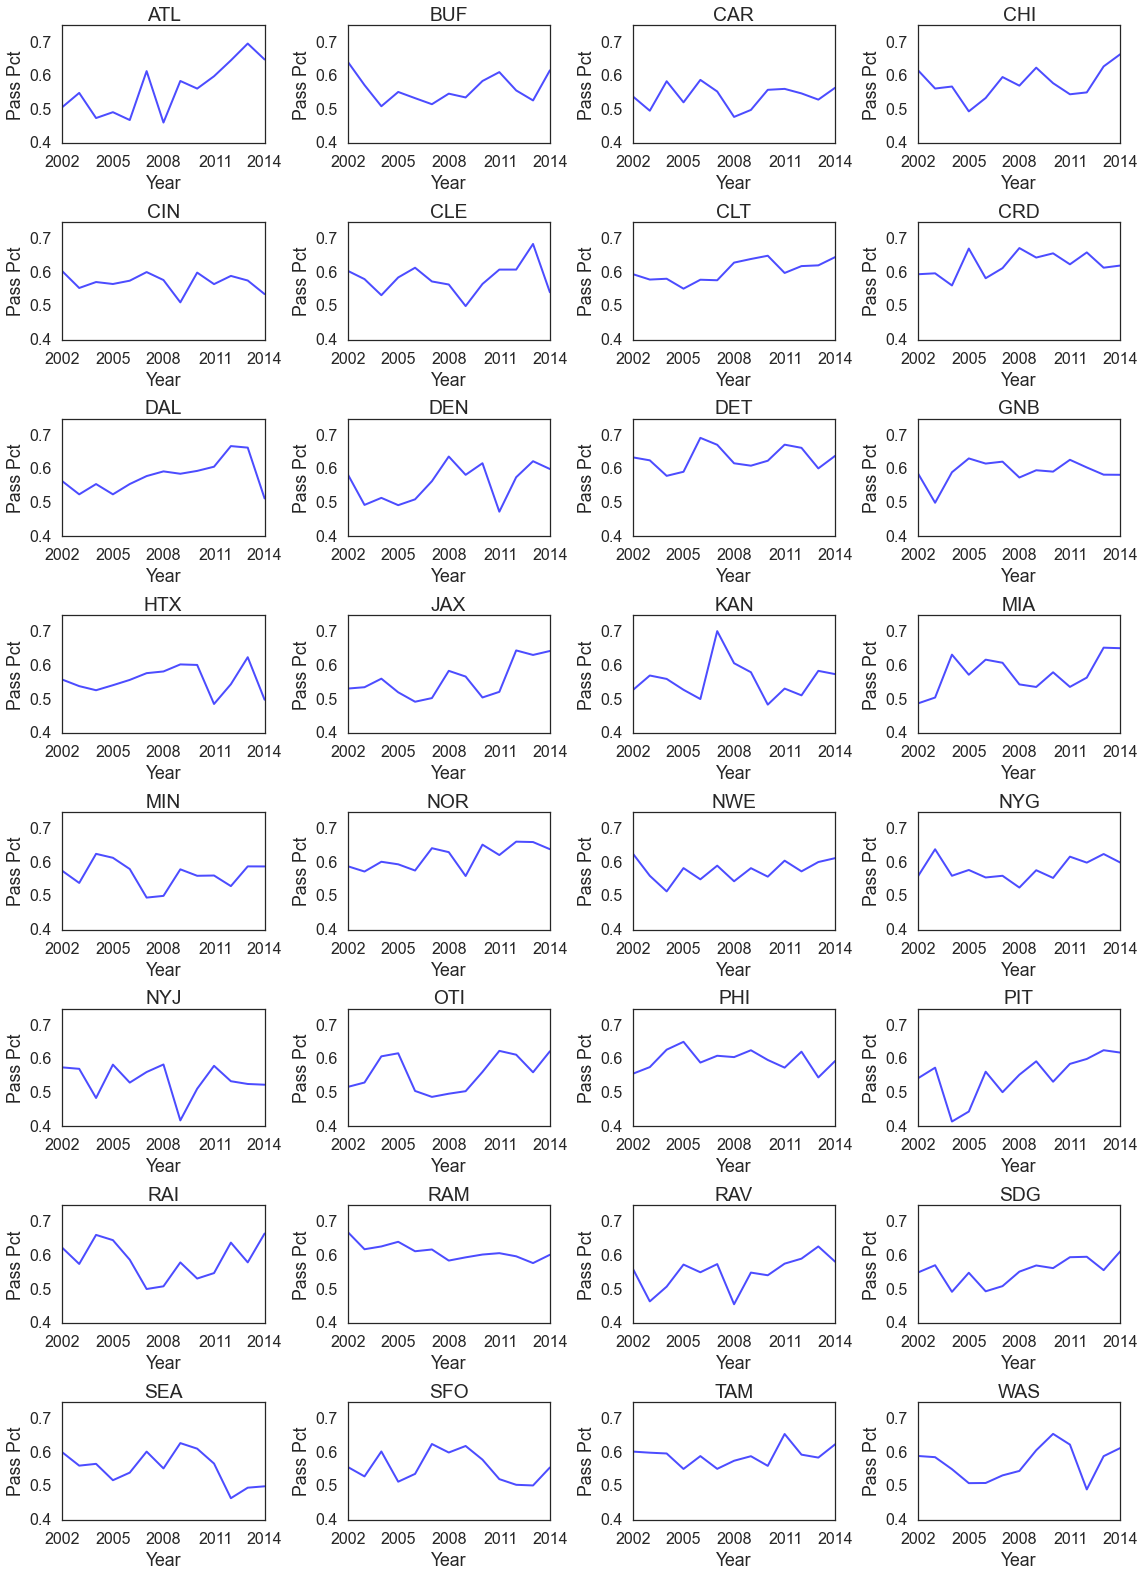

In [30]:
# Plot pass percent for each team
fig, axes = plt.subplots(8,4, figsize=(16,22),tight_layout=True)

for ax, tm in zip(axes.ravel(), teams):
    ax.plot(passpct[tm].keys(), passpct[tm].values, color='b', alpha=.7, lw=2)
    ax.set_ylim(.4,.75)
    ax.set_yticks(np.arange(.4,.8,.1))
    ax.set_xticks(np.arange(2002,2017,3))
    ax.set_title(tm.upper())
    ax.set_xlabel("Year")
    ax.set_ylabel("Pass Pct")
    ax.grid(False)
fig.savefig('images/passpct.png')

These charts display each team's variation on pass percentage from the 2002 through the 2014 NFL season. It's interesting to note that some teams like the Rams, Cardinals, Tampa and the Giants have maintained a relatively constant pass percentage while others such as the Titans, Kansas and Atlanta display a more volatile number of passes throughout their seasons. Further research shows that the decline in the Denver Broncos pass percentage for the 2011 season is likely due to the resurrection of Tim Tebow as their starting quarterback, who did not posess the most accurate arm but great scrambling abilities around the pocket. In addition, the 2009 season of the New York Jets show a remarkable decline in pass percentage as it was the rookie season for their new quarterback, Mark Sanchez. Lastly, the 2013 Atlanta Falcons displayed incredibly high passing percent numbers in 2013 as Matt Ryan threw the ball a career high, 651 times. 


It's clear that both the 2009 New York Jets and the 2013 Atlanta Falcons display interesting and nearly opposite results in pass percentage, so we further broke down each team's play distribution:



**Transition to feature selection:**

We now select our features and proceed to display exploratory charts for both our continuous and indicator variables. In later sections, we will feed these features into our classifiers to predict which plays the offense will run or pass the football. 

In [16]:
#Define our features
lcols = ["distToGoal","inDown3","inDown2","inDown1","inQuarter4","inQuarter3","inQuarter2","inQuarter1","secsElapsedInHalf","margin","yds_to_go","addscore","tm_TO_left","opp_TO_left","inFGRange", "inRedZone", "tm_winprob","inLast3minHalf", "tm_prev_yr_pass","tm_in_season_pass","tm_in_game_pass","StartofDrive","prevWasPass"]

In [17]:
#Define our continuous features
lcols_c = ["distToGoal", "secsElapsedInHalf", "margin", "yds_to_go", "addscore", "tm_winprob", "tm_prev_yr_pass", "tm_in_season_pass", "tm_in_game_pass"]

In [18]:
#Define our indicator features
lcols_i = list(set(lcols) - set(lcols_c))

In [19]:
#Labels
lbl = ["Run", "Pass"]

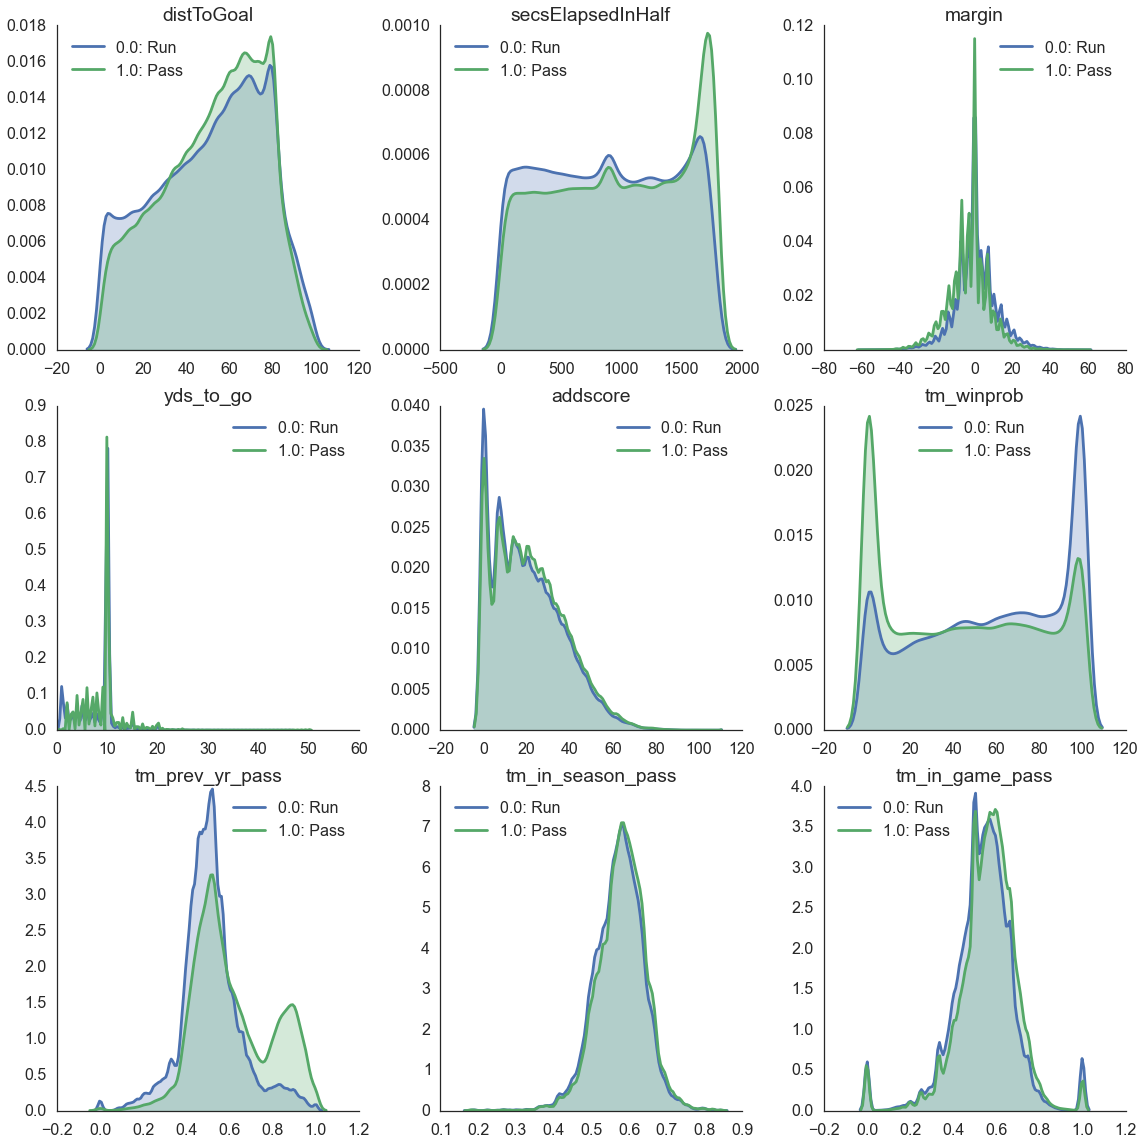

In [27]:
#Display plots of EDA on continuous variables
dfgb=df.groupby('RESP')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16), tight_layout=True)
for ax, p in zip(axes.ravel(), lcols_c):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+": "+lbl[int(k)], shade=True)
        sns.despine()
        ax.set_title(p)
        ax.legend(loc='best')

**Interpretation of continuous features EDA:**


These charts display how well each continuous feature distinguishes between pass and run plays. Some interesting variables that show little overlap among these types of plays are `yds_to_go`, `tm_winprob` and perhaps `tm_prev_yr_pass`. Each one of these interesting features displays an isolated spike in its graph for both positive and negative values (pass or run values respectively). For instance, if there are very few `yds_to_go` then it's likely that the offense will run; whereas, if there is a high or low `tm_winprob` of the offense winning then there is a low and high chance respectively of the team passing. This makes sense since if the team is likely going to win the game, then the offense will elect to run out the clock by running the ball. 

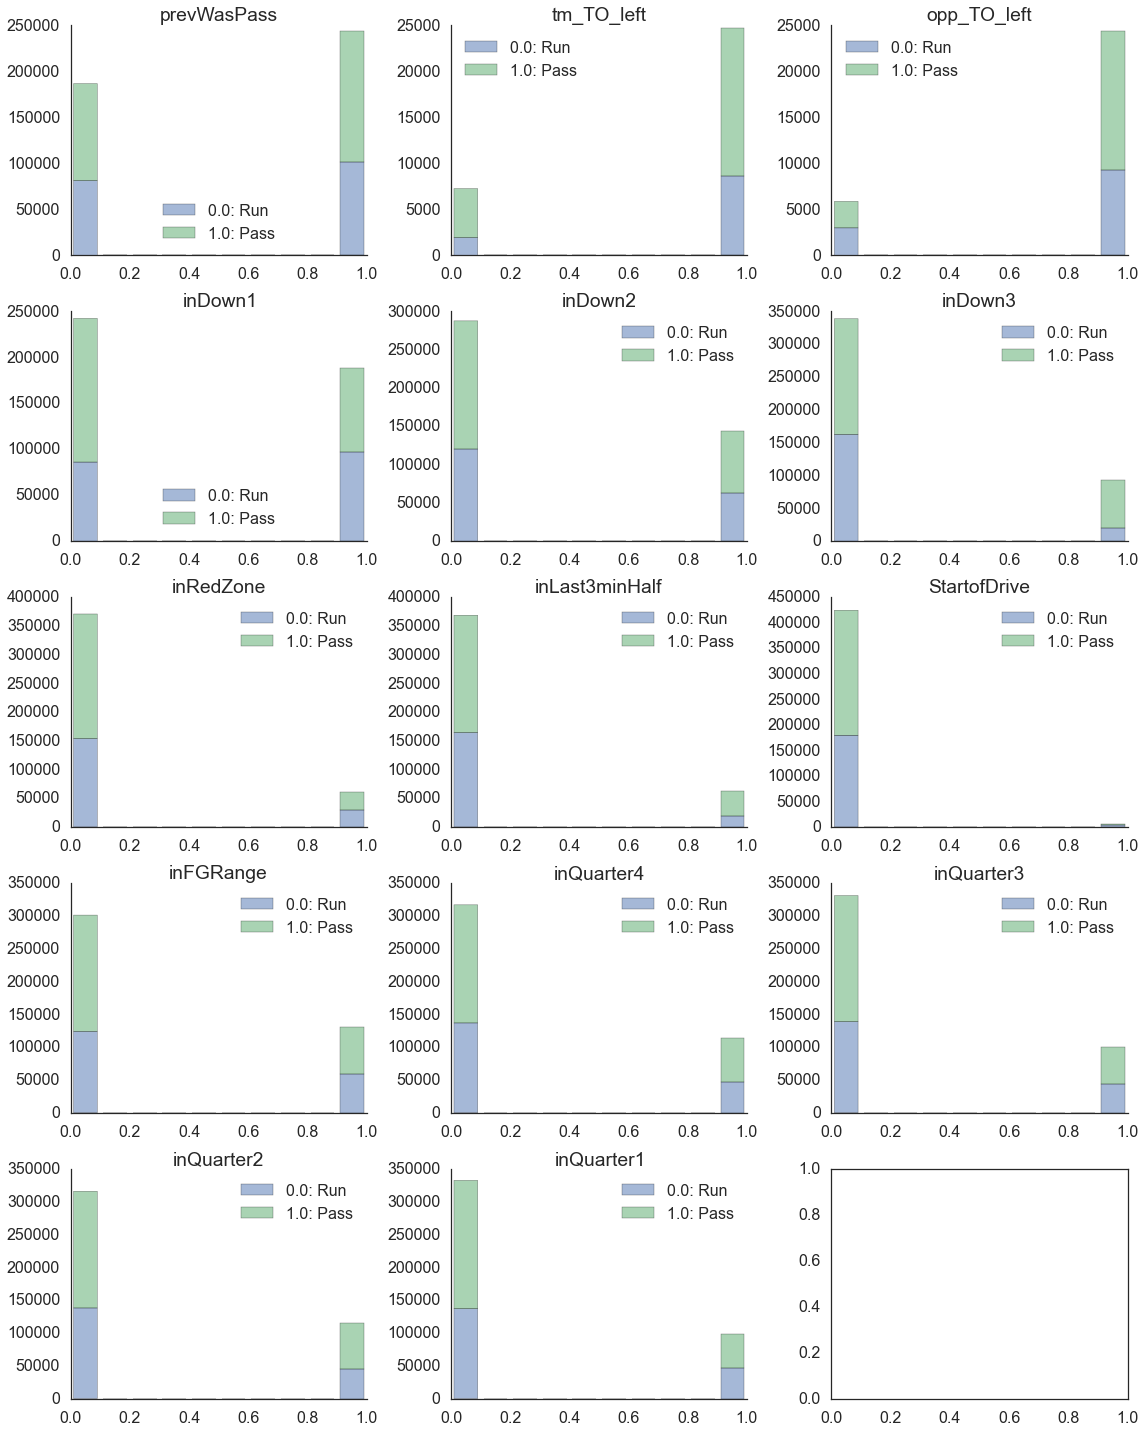

In [28]:
#Display plots of EDA on indicator variables
fig, axes = plt.subplots(nrows=5, ncols=3,figsize=(16,20), tight_layout=True)

for ax, i in zip(axes.ravel(), lcols_i):
    ax.hist([[df[df["RESP"]==0][i]],[df[df["RESP"]==1][i]]], range=(0,1), alpha=0.5, stacked=True)
    ax.legend(["0.0: Run", "1.0: Pass"], loc="best")
    ax.grid(False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_title(i)

**Interpretation of indicator features EDA:**


In these plots of indicator features, we are searching for variables whose distribution is isolated to either positive (1.0: Pass) or negative (0.0: Run) values. Thus, it's clear that indicators such as `inLast3minHalf`, `inDown3` and `tm_TO_left` distinguish between run and pass plays well. For example, the `inDown3` variable is strongly dominated by pass plays when it is active or has a positive value. This suggests that teams typically pass on third down. 

In [ ]:
## ADD IN HISTOGRAMS ON DOWNS VS RUNS AND DOWNS VS PASS
## ADD IN HISTOGRAMS ON RUN PROGRESSIONS AND PASS PROGRESSIONS